<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

Este taller guiado tiene como objetivo hacer un primer acercamiento práctico acerca del aprendizaje computacional  con Python. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* crear particiones de entrenamiento y prueba
* entrenar modelos para clasificación usando 2 algoritmos de Machine Learning
* evaluar el desempeño de modelos de clasificación (primera parte)


**Nota: Se sugiere que estudie este notebook luego de la primera clase del módulo.**

# 1.Importación de librerias

In [ ]:
# El nombre del módulo de Python es sklearn y no scikitlearn
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

from sklearn.metrics import make_scorer

from sklearn.neural_network import MLPClassifier # Multi Layer Perceptron

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.10.12
NumPy 1.26.4
Pandas 2.2.2
Matplotlib 3.8.0
Scikit-learn 1.5.2


#2.Carga de Datos

In [ ]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/Haroldgio28/Probabilidad_de_impago/main/data/case%202/Churn%20Modeling.csv'
    )

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#3.Partición de dataset en entrenamiento y prueba

In [ ]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (10000, 10)
Dimensiones de y: (10000,)


In [ ]:
df['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


In [ ]:
# Ahora usaremos la función train test split que pertencen al paquete model_selection de sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30%
    random_state = 4, # Estado aleatorio - Semilla - seed, # reproducibilidad
    #stratify= y
)

print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (7000, 10)
Dimensiones de y de entrenamiento: (7000,)

Dimensiones de X de prueba: (3000, 10)
Dimensiones de y de prueba: (3000,)


In [ ]:
y_test.shape

(3000,)

In [ ]:
y_train.sum()/y_train.shape[0]

np.float64(0.20757142857142857)

In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9232,618,France,Female,49,9,44301.43,3,1,1,89729.30
2210,673,Germany,Female,34,1,127122.79,3,0,1,76703.10
3611,746,France,Female,21,8,166883.07,2,0,1,194563.65
7095,753,Germany,Female,38,1,117314.92,1,1,0,122021.33
6444,693,Germany,Female,37,6,95900.04,1,1,1,38196.24


In [ ]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

# 4.Pipeline de Procesamiento

In [ ]:
categorical_features = ['Geography', 'Gender',
                        'HasCrCard','IsActiveMember']

numerical_features = ['CreditScore',  'Age', 'Tenure',
                      'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
# Definir los transformadores para las columnas cualitativas y cuantitativas
categorical_transformer = Pipeline(steps=[
    ('dummy', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('estandarizar', StandardScaler( ))
])
numerical_transformer
categorical_transformer

Pipeline(steps=[('dummy', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Puedes incluir otros transformadores para variables cuantitativas si las tienes
# Por ejemplo, StandardScaler para normalizar las variables cuantitativas

# Combinar los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
        # ('num', 'passthrough', numerical_featrures) # Si queremos dejar las variables numéricas sin transformar
        # Puedes agregar más transformadores aquí si es necesario
    ])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('dummy',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Geography', 'Gender', 'HasCrCard',
                                  'IsActiveMember']),
                                ('num',
                                 Pipeline(steps=[('estandarizar',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary'])])

#5.Modelos

## Red Neuronal

In [ ]:
# Crear un perceptron multicapa
mlp = MLPClassifier(max_iter=1000)

# Crear el pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', mlp)])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender',
                                                   'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('num',
                                                  Pipeline(steps=[('estandarizar',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('model', MLPClassifier(max_iter=1000))])

In [ ]:
%%time

# Definir el espacio de búsqueda para RandomizedSearchCV
parameter_space = {
    'model__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], # 3
    'model__activation': ['tanh', 'relu'], # 2
    'model__solver': ['sgd', 'adam'], # 2
    'model__alpha': [0.0001, 0.05], # 2
    'model__learning_rate': ['constant','adaptive'], # 2
} # 48 combinaciones * 3 = 144

# Definir las métricas para evaluar
scoring = {'Accuracy': make_scorer(accuracy_score),
           'Precision': make_scorer(precision_score, average='macro'),
           'Recall': make_scorer(recall_score, average='macro'),
           'F1': make_scorer(f1_score, average='macro')}

# Configurar RandomizedSearchCV
grilla_random = RandomizedSearchCV(
    pipeline,
    parameter_space,
    n_jobs=-1, # Procesamiento en paralelo
    cv=3, # 3 pliegues
    scoring=scoring, # calculamos muchas metricas
    refit='F1', # el mejor modelo se escoge con F1
    return_train_score=True,
    verbose = 3,
    n_iter = 2,
    random_state = 4
    )

# Entrenar el modelo
grilla_random.fit(X_train, y_train)

# Mejores parámetros encontrados
print('Mejores parámetros encontrados:\n', grilla_random.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Mejores parámetros encontrados:
 {'model__solver': 'adam', 'model__learning_rate': 'adaptive', 'model__hidden_layer_sizes': (100,), 'model__alpha': 0.05, 'model__activation': 'relu'}
CPU times: user 9.29 s, sys: 413 ms, total: 9.7 s
Wall time: 3min 7s


In [ ]:
# Predicciones con el mejor modelo encontrado
y_true, y_pred = y_test, grilla_random.predict(X_test)

# Calcular e imprimir las métricas de interés
print('Accuracy:', accuracy_score(y_true, y_pred))
print('Precision:', precision_score(y_true, y_pred, average='macro'))
print('Recall:', recall_score(y_true, y_pred, average='macro'))
print('F1 Score:', f1_score(y_true, y_pred, average='macro'))

Accuracy: 0.8693333333333333
Precision: 0.8155285574640414
Recall: 0.7306030572439445
F1 Score: 0.7609561752988048


## Vecinos más cercanos


In [ ]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [ ]:
# Cambiamos el clasificador a un DecisionTreeClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)

# Crear el pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', classifier)])

#  Ahora puedes usar este pipeline para entrenar tu modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender',
                                                   'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('num',
                                                  Pipeline(steps=[('estandarizar',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('model', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
score_entrenamiento = pipeline.score(X_train, y_train) # y_train_predicho
score_prueba = pipeline.score(X_test, y_test) # y_test_predicho
print(score_entrenamiento,score_prueba)

# Es una medida de desempeño, mayor es mejor [0,1]

1.0 0.8016666666666666


In [ ]:
k_value = np.linspace(1,164,num= 50,dtype = 'int') # Crea un array de números entre 1 y 164

score_prueba_lista = []
score_entrenamiento_lista = []

for vecinos in k_value:

  classifier = KNeighborsClassifier(n_neighbors = vecinos)

  # Crear el pipeline completo
  pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', classifier)])

  #  Ahora puedes usar este pipeline para entrenar tu modelo
  pipeline.fit(X_train, y_train)

# medimos metricas
  score_entrenamiento = pipeline.score(X_train, y_train)
  score_entrenamiento_lista.append(score_entrenamiento)

  score_prueba = pipeline.score(X_test, y_test)
  score_prueba_lista.append(score_prueba)
#   print(f'Se entrenó el modelo con {vecinos} vecinos')

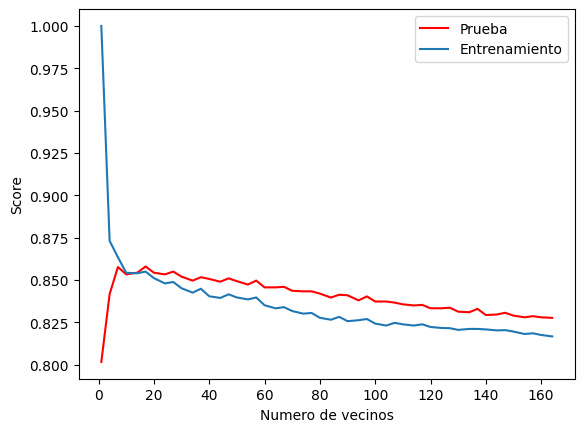

In [ ]:
plt.plot(k_value,score_prueba_lista, color = 'red', label = 'Prueba')
plt.plot(k_value,score_entrenamiento_lista, label = 'Entrenamiento')

plt.legend()
plt.xlabel('Numero de vecinos')
plt.ylabel('Score')

plt.show()

In [ ]:
results = pd.DataFrame({'k':k_value,
              'score_prueba':score_prueba_lista,
              'score_entrenamiento':score_entrenamiento_lista
              })

results.sort_values(by='score_prueba', ascending = False).head()

,k,score_prueba,score_entrenamiento
5,17,0.858000,0.855000
2,7,0.857667,0.863429
8,27,0.855000,0.848857
4,14,0.854333,0.854000
6,20,0.854333,0.851143


In [ ]:
best_k = 17

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = best_k)

# Crear el pipeline completo
pipeline_vec = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', classifier)])

#  Ahora puedes usar este pipeline para entrenar tu modelo
pipeline_vec.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender',
                                                   'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('num',
                                                  Pipeline(steps=[('estandarizar',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('model', KNeighborsClassifier(n_neighbors=17))])

In [ ]:
# Predicciones con el mejor modelo encontrado
y_true, y_pred_vec = y_test, pipeline_vec.predict(X_test)

# Calcular e imprimir las métricas de interés
print('Accuracy:', accuracy_score(y_true, y_pred_vec))
print('Precision:', precision_score(y_true, y_pred_vec, average='macro'))
print('Recall:', recall_score(y_true, y_pred_vec, average='macro'))
print('F1 Score:', f1_score(y_true, y_pred_vec, average='macro'))

Accuracy: 0.858
Precision: 0.8189888913619716
Recall: 0.6787710922616348
F1 Score: 0.7152802284174393


## Arbol de Decisión

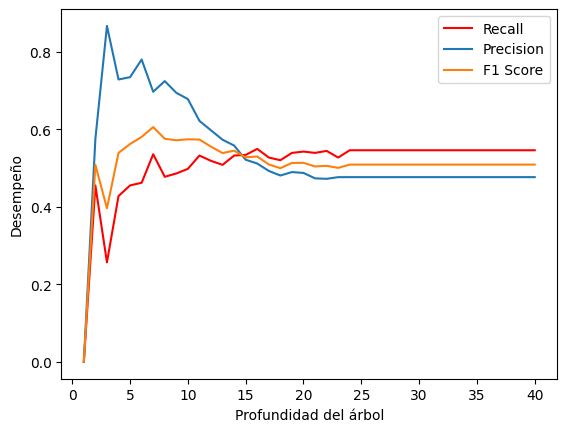

In [ ]:
profundidad_valor = np.linspace(1,40,num= 40,dtype = 'int')

recall_prueba_lista = []
precision_prueba_lista = []
f1_prueba_lista = []

for prof in profundidad_valor:

  clf = DecisionTreeClassifier(random_state=0,max_depth = prof )

  # Crear el pipeline completo
  pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', clf)])

  #  Ahora puedes usar este pipeline para entrenar tu modelo
  pipeline_dt.fit(X_train, y_train)

  y_pred_test = pipeline_dt.predict(X_test)

  # medimos metricas
  precision = precision_score(y_test,y_pred_test)
  precision_prueba_lista.append(precision)

  recall = recall_score(y_test,y_pred_test)
  recall_prueba_lista.append(recall)

  f1 = f1_score(y_test,y_pred_test)
  f1_prueba_lista.append(f1)

plt.plot(profundidad_valor,recall_prueba_lista, color = 'red', label='Recall')
plt.plot(profundidad_valor,precision_prueba_lista, label='Precision')
plt.plot(profundidad_valor,f1_prueba_lista, label = 'F1 Score')

plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Desempeño')

plt.show()

In [ ]:
results_arbol = pd.DataFrame({'profundidad':profundidad_valor,
              'recall_prueba':recall_prueba_lista,
              'precision_prueba':precision_prueba_lista,
              'f1_prueba':f1_prueba_lista
              })

results_arbol.sort_values(by='f1_prueba', ascending = False).head(5)

,profundidad,recall_prueba,precision_prueba,f1_prueba
6,7,0.535959,0.697105,0.606002
5,6,0.462329,0.780347,0.580645
7,8,0.477740,0.724675,0.575851
9,10,0.498288,0.678322,0.574531
10,11,0.532534,0.622000,0.573801


In [ ]:
best_profundidad = 7

clf = DecisionTreeClassifier(random_state=0,max_depth = best_profundidad )

# Crear el pipeline completo
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', clf)])

#  Ahora puedes usar este pipeline para entrenar tu modelo
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender',
                                                   'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('num',
                                                  Pipeline(steps=[('estandarizar',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('model', DecisionTreeClassifier(max_depth=7, random_state=0))])

In [ ]:
y_true, y_pred_dt = y_test, pipeline_dt.predict(X_test)

print('Decision Tree')
# Calcular e imprimir las métricas de interés
print('Accuracy:', accuracy_score(y_true, y_pred_dt))
print('Precision:', precision_score(y_true, y_pred_dt, average='macro'))
print('Recall:', recall_score(y_true, y_pred_dt, average='macro'))
print('F1 Score:', f1_score(y_true, y_pred_dt, average='macro'))

Decision Tree
Accuracy: 0.8643333333333333
Precision: 0.7954359135986674
Recall: 0.7398337566905562
F1 Score: 0.7620305633833836


## Random Forest

100%|██████████| 10/10 [00:26<00:00,  2.66s/it]


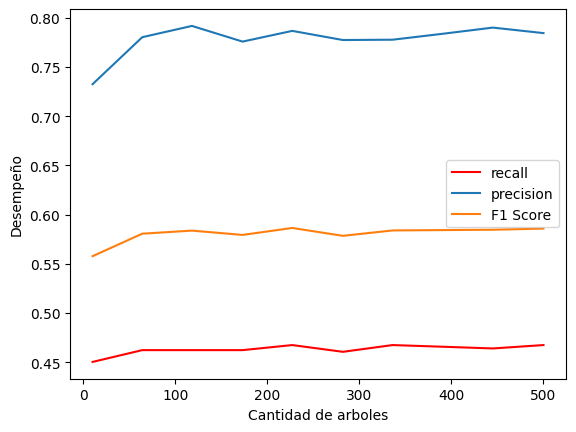

In [ ]:
cantidad_arboles = np.linspace(10,500,num= 10,dtype = 'int')

recall_prueba_lista_rf = []
precision_prueba_lista_rf = []
f1_prueba_lista_rf=[]

for arbol in tqdm(cantidad_arboles):

  clf_rf = RandomForestClassifier(random_state=0,
                               max_depth = 30,
                               n_estimators = arbol,
                               max_samples = 0.75)

  # Crear el pipeline completo
  pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', clf_rf)])

  #  Ahora puedes usar este pipeline para entrenar tu modelo
  pipeline_rf.fit(X_train, y_train)

  y_pred_test = pipeline_rf.predict(X_test)

  # medimos metricas
  precision = precision_score(y_test,y_pred_test)
  precision_prueba_lista_rf.append(precision)

  recall = recall_score(y_test,y_pred_test)
  recall_prueba_lista_rf.append(recall)

  f1 = f1_score(y_test,y_pred_test)
  f1_prueba_lista_rf.append(f1)

plt.plot(cantidad_arboles,recall_prueba_lista_rf, color = 'red', label='recall')
plt.plot(cantidad_arboles,precision_prueba_lista_rf, label='precision')
plt.plot(cantidad_arboles,f1_prueba_lista_rf, label='F1 Score')

plt.legend()
plt.xlabel('Cantidad de arboles')
plt.ylabel('Desempeño')

plt.show()

In [ ]:
results_rf = pd.DataFrame({'cantidad_arboles':cantidad_arboles,
              'recall_prueba':recall_prueba_lista_rf,
              'precision_prueba':precision_prueba_lista_rf,
              'f1_prueba':f1_prueba_lista_rf
              })

results_rf.sort_values(by='f1_prueba', ascending = False).head(5)

,cantidad_arboles,recall_prueba,precision_prueba,f1_prueba
4,227,0.467466,0.786744,0.586466
9,500,0.467466,0.784483,0.585837
8,445,0.464041,0.790087,0.584682
7,391,0.465753,0.783862,0.584318
6,336,0.467466,0.777778,0.583957


In [ ]:
best_cantidad_arboles = 227

#Entrenamiento del modelo con los mejores parametros encontrados
clf_rf = RandomForestClassifier(random_state=0,
                               max_depth = 30,
                               n_estimators = best_cantidad_arboles,
                               max_samples = 0.75)

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', clf_rf)])

  #  Ahora puedes usar este pipeline para entrenar tu modelo
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender',
                                                   'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('num',
                                                  Pipeline(steps=[('estandarizar',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('model',
                 RandomForestClassifier(max_depth=30, max_samples=0.75,
                                        n_estimators=227, random_state=0))])

In [ ]:
y_true, y_pred_rf = y_test, pipeline_rf.predict(X_test)

print('Random Forest')
# Calcular e imprimir las métricas de interés
print('Accuracy:', accuracy_score(y_true, y_pred_rf))
print('Precision:', precision_score(y_true, y_pred_rf, average='macro'))
print('Recall:', recall_score(y_true, y_pred_rf, average='macro'))
print('F1 Score:', f1_score(y_true, y_pred_rf, average='macro'))

Random Forest
Accuracy: 0.8716666666666667
Precision: 0.8347588668583552
Recall: 0.7184183071759049
F1 Score: 0.7552571505702508


#6.Comparativa de Resultados

In [ ]:
# Crear una lista para almacenar los resultados
results = []

# Predicciones con el mejor modelo encontrado de redes neuronales
y_true, y_pred = y_test, grilla_random.predict(X_test)
results.append({
    'Model': 'Red Neuronal',
    'Accuracy': accuracy_score(y_true, y_pred),
    'Precision': precision_score(y_true, y_pred, average='macro'),
    'Recall': recall_score(y_true, y_pred, average='macro'),
    'F1 Score': f1_score(y_true, y_pred, average='macro')
})

# Predicciones con el mejor modelo vecinos más cercanos
y_true, y_pred_vec = y_test, pipeline_vec.predict(X_test)
results.append({
    'Model': 'Vecino más cercanos',
    'Accuracy': accuracy_score(y_true, y_pred_vec),
    'Precision': precision_score(y_true, y_pred_vec, average='macro'),
    'Recall': recall_score(y_true, y_pred_vec, average='macro'),
    'F1 Score': f1_score(y_true, y_pred_vec, average='macro')
})

# Predicciones con el mejor modelo arbol de decision
y_true, y_pred_dt = y_test, pipeline_dt.predict(X_test)
results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_true, y_pred_dt),
    'Precision': precision_score(y_true, y_pred_dt, average='macro'),
    'Recall': recall_score(y_true, y_pred_dt, average='macro'),
    'F1 Score': f1_score(y_true, y_pred_dt, average='macro')
})

# Predicciones con el mejor modelo Random Forest
y_true, y_pred_rf = y_test, pipeline_rf.predict(X_test)
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_true, y_pred_rf),
    'Precision': precision_score(y_true, y_pred_rf, average='macro'),
    'Recall': recall_score(y_true, y_pred_rf, average='macro'),
    'F1 Score': f1_score(y_true, y_pred_rf, average='macro')
})

# Convertir la lista de resultados en un DataFrame
df_results = pd.DataFrame(results)

# Ordenar el DataFrame por F1 Score en orden descendente
df_results = df_results.sort_values(by='F1 Score', ascending=False)

# Mostrar el DataFrame
df_results

,Model,Accuracy,Precision,Recall,F1 Score
2,Decision Tree,0.864333,0.795436,0.739834,0.762031
0,Red Neuronal,0.869333,0.815529,0.730603,0.760956
3,Random Forest,0.871667,0.834759,0.718418,0.755257
1,Vecino más cercanos,0.858000,0.818989,0.678771,0.715280


# Conclusiones
- Los pipelines de procesamiento hacen que se pueda organizar la limpieza, transformación y entrenamiento de modelos.

- La red neuronal es la que obtiene un mejor performance en la mayoría de métricas.
- A pesar de las buenas métricas que tiene la red neuronal, el modelo Random Forest también logra buenas métricas, y una mayor explicabilidad del modelo, sin embargo debido a la cantidad de arboles usados en el modelo y al aumentar la complejidad también pierde explicabilidad.
- Lo invito a que evalúe las mejores características del modelo de Random Forest.

# Próximos pasos
- Genere el mismo análisis comparativo de modelos para un problema de regresión con alguno de los datasets trabajados durante el programa. Ej: Housing

## **Créditos**
---

**Profesor:** Harold Uribe Romero

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*